In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
from __future__ import print_function, division
from scipy.signal import argrelextrema

# Exercise1

## Task1

Exponential model of growth of an organism is dN/dt rN where N(t) is the population at time t and r > 0 is the growth rate.

To overcome the ideas of overcrowding and limited resources in the exponential growth model logistic equation is used. 

One dimensional logistic equation is:

dN/dt = r*N*(1-N/K) where N(t) is the population at time t, r > 0 is the growth rate and K is the carrying capacity

### Part 1

Solve the above equation analytically and plot the result in a time series manner.

#### Solution

Note: For simplicity N(t) is written as N

Analytical Solution of the given equation is given by applying the following steps

$\frac{dN}{dt} = r \times {N \times (1-\frac{N}{K})}$

Seperate the 2 variables N and t

$\frac{dN}{N(1-\frac{N}{K})} = r \times dt$

Partial Fraction Decomposition

$\frac{1}{N(1-\frac{N}{K})} = \frac{1}{N} + \frac{\frac{1}{K}}{1-\frac{N}{K}}$

Substitution and Integration

$\int \frac{1}{N} + \frac{\frac{1}{K}}{1-\frac{N}{K}} dN = \int r \times dt$

Separate Integration for each term 

$\int r \times dt = rt + C_1$

$\int \frac{1}{N} dN = \ln{N} + C_2$

For $\int \frac{\frac{1}{K}}{1 - \frac{N}{K}} dN$ 

Assume $u = 1 - \frac{N}{K}$ => $du = - \frac{1}{k} dN$

$\int \frac{-du}{u} = -\ln u + C_3 = -\ln{1 - \frac{N}{K}} + C_3$

$\ln{N} - \ln{1 - \frac{N}{K}} = \ln{\frac{N}{1-\frac{N}{K}}} = rt + C$

$\frac{N}{1-\frac{N}{K}} = e^{rt + C}$

$\frac{N}{1-\frac{N}{K}}= Ae^{rt}$

Obtain the equation in terms of N

$N = Ae^{rt} \times 1 - \frac{N}{K}$

$N = Ae^{rt} - Ae^{rt} \times \frac{N}{K}$

$N + Ae^{rt} \times \frac{N}{K} = Ae^{rt}$

$N\big[1 + \frac{Ae^{rt}}{K}\big] = Ae^{rt}$

$N = \frac{Ae^{rt}}{1 + \frac{Ae^{rt}}{K}}$

To obtain a value for A, let us consider an initial condition at time $t=0$

$Ae^0 = A$

$No = \frac{A}{1 + \frac{A}{K}}$

$No = \frac{AK}{K+A}$

$No(K+A) = AK$

$NoK + NoA = AK$

$NoA - AK = -NoK$

$AK -NoA = NoK$

$A = \frac{NoK}{K - No}$

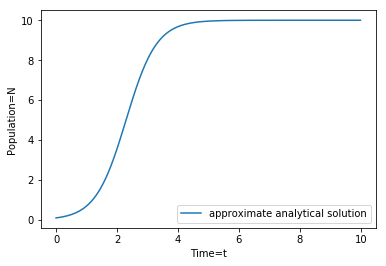

In [2]:
#Time steps: an array of values starting from 0 going up to 10, in step size of 0.01
t = np.arange(0, 10, 0.01)
# parameters
r = 2
K = 10
# initial condition
No = 0.1
A = (No*K)/(K-No)
N = (A*np.exp(r*t))/(1 + ((A*np.exp(r*t))/K))
# t is an array, it is the same as doing it for each element
plt.plot(t, N)
plt.legend(['approximate analytical solution'], loc='best') # draw legend
plt.xlabel('Time=t') # define label of x-axis
plt.ylabel('Population=N') # and of y-axis
plt.show()

### Part 2

Simulate it using numerical tools and compare the plots (try different solvers and step sizes)

Using scipy.integrate package function odeint

In [3]:
 def derivativeFunction(N, t, r, K):
    """Derivative functiion"""   
     # let's define the right-hand side of the differential equation
    # It must be a function of the dependent variable (N) and of the time (t), even if time does not appear explicitly
    return r*N*(1-N/K)

In [4]:
def demo_odeint(time, No, r, K):
    #The order of the arguments for ode function: the derivative function, the initial condition, the points where we want the solution, and a list of parameters
    N = odeint(derivativeFunction, No, time, (r, K))
    # plot the solution
    plt.plot(time, N)
    plt.xlabel('Time') # define label of x-axis
    plt.ylabel('Population') # and of y-axis
    plt.legend(['Exact solution using scipy.integrate'], loc='best') # draw legend
    plt.show()


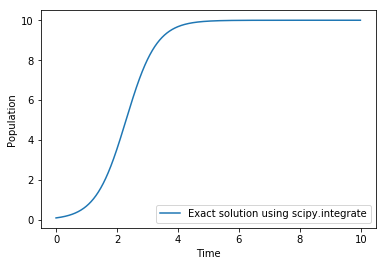

In [5]:
# time steps: an array of values starting from 0 going up to 10, in steps of 0.01
t = np.arange(0, 10, 0.01)
# parameters
r = 2
K = 10
# initial condition
No = 0.1
demo_odeint(t, No, r, K)


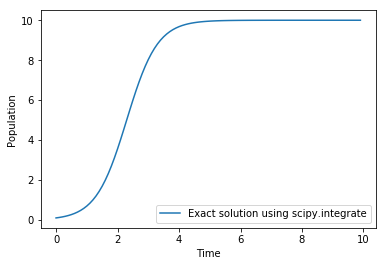

In [6]:
# time steps: an array of values starting from 0 going up to 10, in steps of 0.1
t = np.arange(0, 10, 0.1)
# parameters
r = 2
K = 10
# initial condition
No = 0.1
demo_odeint(t, No, r, K)



Eulers method

In [7]:
# Logistic growth rate differential equation
def logisticGrowth(N,K,r):
    return r*N*(1-(N/K))

In [8]:
def demoEulersMethod(start, end, nsteps, carryingCapacity, growthRate, initialValue):
    stepSize = (end-start)/nsteps
    # Create arrays to hold values of t and N
    time = np.arange(start,end+stepSize,stepSize)
    narray = np.zeros((nsteps+1,))
    # set the initial values
    time[0], narray[0] = initialValue
    # Apply Euler's method
    for i in range(1,nsteps+1):
        narray[i] = narray[i-1] + stepSize*logisticGrowth(narray[i-1], carryingCapacity, growthRate)
    return time, narray

In [9]:
# Analytical solution
def analyticalSolution(t, No, r, K):
    No = 5.3
    r = 0.029443
    K = 189.4
    A = (No*K)/(K-No) 
    N = (A*np.exp(r*t))/(1 + ((A*np.exp(r*t))/K))
    return N


In [10]:
def plotComparisonEulersAnalytical(time, narray, N):
    plt.plot(time, narray, label='Euler')
    plt.plot(time, N, label='Analytical' )
    plt.title( "Euler's Method Logistic Growth, steps="+str(nsteps))
    plt.xlabel('time') 
    plt.ylabel('solution')
    plt.legend(loc=4)
    plt.grid()
    plt.show()


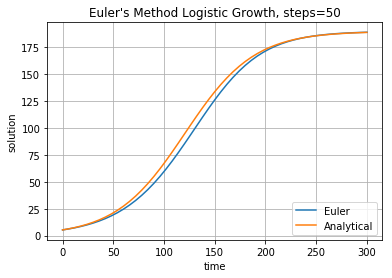

In [11]:
start = 0
end = 300
nsteps = 50
carryingCapacity = 189.4
growthRate = 0.029443
initialValue = (0.0,5.3)
No = 5.3
time, narray = demoEulersMethod(start, end, nsteps, carryingCapacity, growthRate, initialValue)
N = analyticalSolution(time, No, growthRate, carryingCapacity)
plotComparisonEulersAnalytical(time, narray, N)

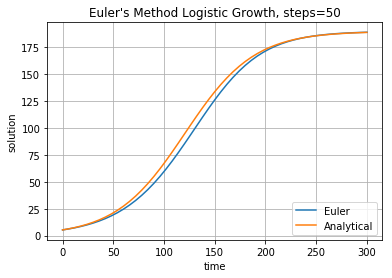

In [12]:
start = 0
end = 300
nsteps = 50
carryingCapacity = 189.4
growthRate = 0.029443
initialValue = (0.0,5.3)
No = 5.3
time, narray = demoEulersMethod(start, end, nsteps, carryingCapacity, growthRate, initialValue)
N = analyticalSolution(time, No, growthRate, carryingCapacity)
plotComparisonEulersAnalytical(time, narray, N)

## Task 2

3-dimensional Goldbeter model for expression and regulation of the Neurospora “frequency protein” (FRQ)

For the concentrations of the mRNA (M), the “frequency protein” (FC) synthesized in the cytoplasm and the successively built up protein concentration (FN) in the nucleus, there is a system of three differential equations:

$\frac{dM}{dt} = V_s \frac{K^n}{K^n + F_N^n} - V_m \frac{M}{K_M+M}$

$\frac{dF_C}{dt} = k_s M - V_d \frac{F_C}{K_d + F_C} - k_{in}F_C + k_{out}F_N$

$\frac{dF_N}{dt} = k_{in}F_C - k_{out}F_N$

In [13]:
def Period(state,t):
    # unpack the initial state vector
    M = state[0] #concentration of mRNA
    Fc = state[1] #freuqency protein synthesised in cytoplasm
    Fn = state[2] #successively built up protein concentration
    # these are our constants
    #Vs = 2.0
    Vs = 1.5
    Vm = 1.5
    Vd = 1.0
    ks = 0.5
    K = 0.2
    Km = 0.15
    Kd = 0.15
    kin = 0.02
    kout = 0.1
    n = 4 #Hill number
    # compute state derivatives w.r.t time
    dM = (Vs*(K**n))/(K**n+Fn**n)-(Vm*M/(Km+M))
    dFc = ks*M - (Vd*(Fc/(Kd+Fc))) - (kin*Fc) + (kout*Fn)
    dFn = kin*Fc - kout*Fn
    # return the state derivatives
    return [dM, dFc, dFn]

In [14]:
def viewCircadianClock(result_odeint):
    fig, axes = plt.subplots(1,1, figsize=(5, 5))
    plt.plot(result_odeint[:,1], result_odeint[:,0])
    plt.xlabel("concentration of protein in cytoplasm")
    plt.ylabel("concentration of mRNA")
    plt.show()

In [15]:
def viewProductConcentrationEvolution(result_odeint, time):
    fig, axes = plt.subplots(1,1, figsize=(10, 10))
    labels = ["concentration of mRNA", "protein level in cytoskeleton", "protein level in nucleus"]
    plt.plot (time, result_odeint[:,0], 'b', time, result_odeint[:,1], 'g', time, result_odeint[:,2], 'r')
    #plt.plot(time, result_odeint[:,0], 'b')
    #plt.plot(time, result_odeint[:,1], 'g')
    #plt.plot(time, result_odeint[:,2], 'r')
    plt.legend(labels, loc='best') 
    plt.show()

### Part a

In [16]:
def periodWithVarying_kin(state,t, kin):
    # unpack the initial state vector
    M = state[0] #concentration of mRNA
    Fc = state[1] #freuqency protein synthesised in cytoplasm
    Fn = state[2] #successively built up protein concentration
    # these are our constants
    #Vs = 2.0
    Vs = 1.5
    Vm = 1.5
    Vd = 1.0
    ks = 0.5
    K = 0.2
    Km = 0.15
    Kd = 0.15
    kin = kin
    kout = 0.1
    n = 4 #Hill number
    # compute state derivatives w.r.t time
    dM = (Vs*(K**n))/(K**n+Fn**n)-(Vm*M/(Km+M))
    dFc = ks*M - (Vd*(Fc/(Kd+Fc))) - (kin*Fc) + (kout*Fn)
    dFn = kin*Fc - kout*Fn
    # return the state derivatives
    return [dM, dFc, dFn]

### Determine period by considering the protein level in cytoplasm F(t)

In [17]:
def findPeriodBasedOnFc(minkin, maxkin,stepsize,state0, timeGap):
    starttime = 0.0
    endtime = 1000
    t = np.arange(starttime, endtime, timeGap)
    Ps = []
    kinvalues = np.arange(minkin,maxkin,stepsize)
    # Iterate through all the kin values
    for x in kinvalues:
        result_odeint = odeint(periodWithVarying_kin, state0, t, args=(x,))
        # Array containing the values of M
        Farray = result_odeint[:,1]
        # Get the indices of the maxima
        # Index represents the no. of steps from start time
        maxindices = argrelextrema(Farray, np.greater)
         # List of all timepoints where M(t) is maximum
        xlist = []
        if len(maxindices[0]) > 1:
            for item in maxindices[0]:
                xlist.append(t[item])
        # Get the differences between values
        differences = np.diff(xlist)
        #print(differences)
        # Get the mean period
        meanP = np.average(differences)
        #print(meanP)
        if 21.48 < meanP < 21.53:
            # Append a tuple of (kin, mean period)
            Ps.append((x, meanP, result_odeint, t, Farray[maxindices], t[maxindices], maxindices))
    return Ps

### Determine period by considering the protein level in cytoplasm  M(t)

In [18]:
def findPeriodBasedOnM(minkin, maxkin,stepsize,state0, timeGap):
    starttime = 0.0
    endtime = 1000
    t = np.arange(starttime, endtime, timeGap)
    Ps = []
    kinvalues = np.arange(minkin,maxkin,stepsize)
    # Iterate through all the kin values
    for x in kinvalues:
        result_odeint = odeint(periodWithVarying_kin, state0, t, args=(x,))
        # Array containing the values of M
        Marray = result_odeint[:,0]
        # Get the indices of the maxima
        # Index represents the no. of steps from start time
        maxindices = argrelextrema(Marray, np.greater)
         # List of all timepoints where M(t) is maximum
        xlist = []
        if len(maxindices[0]) > 1:
            for item in maxindices[0]:
                xlist.append(t[item])
        # Get the differences between values
        differences = np.diff(xlist)
        #print(differences)
        # Get the mean period
        meanP = np.average(differences)
        #print(meanP)
        if 21.48 < meanP < 21.53:
            # Append a tuple of (kin, mean period)
            Ps.append((x,meanP, result_odeint, t))
    return Ps

In [19]:
def viewResultForPeriodsWithVarying_kin(results):
    for result in results:
        kin = result[0]
        period = result[1]
        result_odeint = result[2]
        time = result[3]
        print(kin, period)
        viewCircadianClock(result_odeint)
        viewProductConcentrationEvolution(result_odeint, time)

In [20]:
def viewResultForPeriodsForProteinWithVarying_kin(results):
    for result in results:
        kin = result[0]
        period = result[1]
        result_odeint = result[2]
        time = result[3]
        pointsWithPeaks = result[4]
        timeWithPeaks = result[5]
        maxindices = result[6]
        print(kin, period)
        fig, axes = plt.subplots(1,1, figsize=(5, 5))
        plt.plot(result_odeint[:,1], result_odeint[:,0], c = 'blue')
        #plt.plot(result_odeint[:,1][maxindices], '.', c = 'black')
        plt.xlabel("concentration of protein in cytoplasm")
        plt.ylabel("concentration of mRNA")
        plt.show()
        fig, axes = plt.subplots(1,1, figsize=(10, 10))
        labels = ["concentration of mRNA", "protein level in cytoskeleton", "protein level in nucleus"]
        plt.plot (time, result_odeint[:,0], 'blue', time, result_odeint[:,1], 'green', time, result_odeint[:,2], 'red')
        plt.plot(timeWithPeaks, pointsWithPeaks, '.', c= 'black')
        plt.legend(labels, loc='best') 
        plt.show()

### Attempt 1

In [21]:
minkin = 0.01
maxkin = 0.1
stepsize = 0.0001
state0 = [0, 0, 0]
timeGap = 0.001

1
0.0244 21.5194


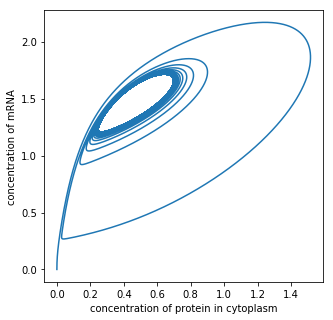

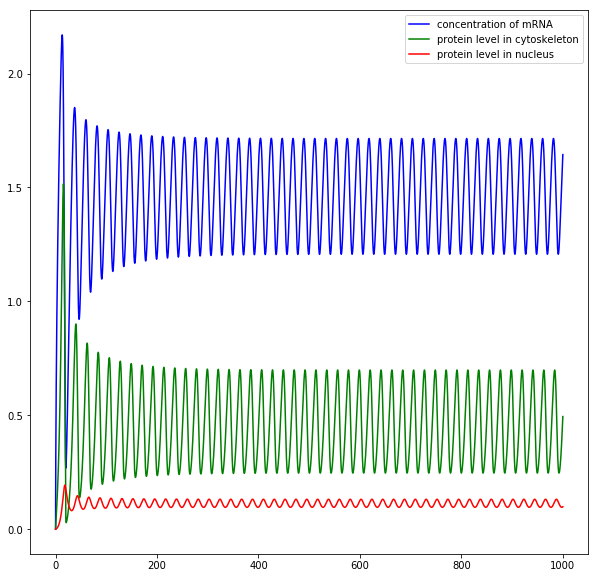

0.0244 21.5194


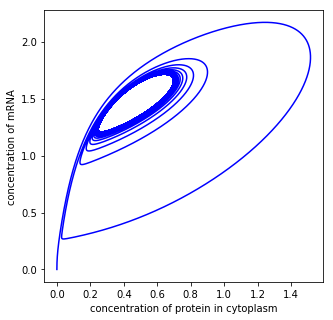

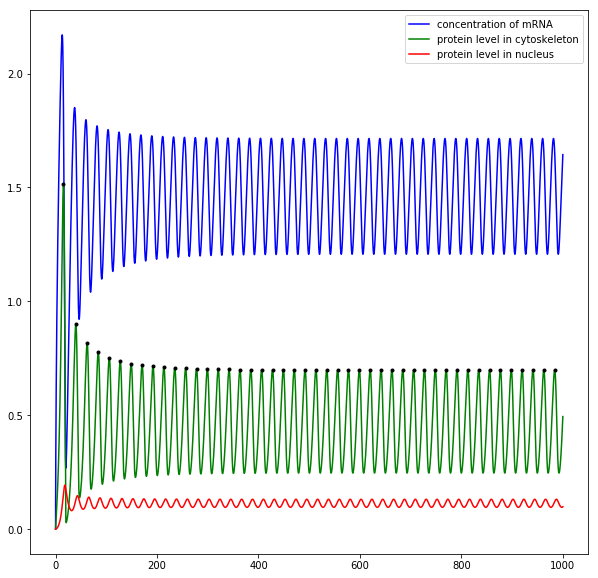

In [ ]:
results = findPeriodBasedOnFc(minkin, maxkin, stepsize, state0, timeGap)
print(len(results))
viewResultForPeriodsWithVarying_kin(results)
viewResultForPeriodsForProteinWithVarying_kin(results)

In [ ]:
results = findPeriodBasedOnM(minkin, maxkin, stepsize, state0, timeGap)
print(len(results))
viewResultForPeriodsWithVarying_kin(results)

Attempt 2

In [ ]:
minkin = 0.01
maxkin = 0.1
stepsize = 0.0001
state0 = [0, 0, 0]
timeGap = 0.01

In [ ]:
results = findPeriodBasedOnFc(minkin, maxkin, stepsize, state0, timeGap)
print(len(results))
viewResultForPeriodsWithVarying_kin(results)

In [ ]:
results = findPeriodBasedOnM(minkin, maxkin, stepsize, state0, timeGap)
print(len(results))
viewResultForPeriodsWithVarying_kin(results)

### Part 2b

In [ ]:
def findPeriodOfClock(state0):
    h = 0.001
    starttime = 0.0
    endtime = 1000
    t = np.arange(starttime, endtime, h)
    result_odeint = odeint(Period, state0, t)
    # Array containing the values of M
    Farray = result_odeint[:,1]
    # Get the indices of the maxima
    # Index represents the no. of steps from start time
    maxindices = argrelextrema(Farray, np.greater)
    # List of all timepoints where M(t) is maximum
    xlist = []
    if len(maxindices[0]) > 1:
        for item in maxindices[0]:
            xlist.append(t[item])
        # Get the differences between values
        differences = np.diff(xlist)
        # Get the mean period
        meanP = np.average(differences)
    return meanP

In [ ]:
state0 = [0, 0, 0]
periodOfClock = findPeriodOfClock(state0)
print("Period of the clock is", periodOfClock)

### Part 2c

In [ ]:
state0 = [0, 0, 0]
h = 0.001
starttime = 0.0
endtime = 1000
t = np.arange(starttime, endtime, h)
result_odeint = odeint(Period, state0, t)

In [ ]:
viewCircadianClock(result_odeint)

In [ ]:
viewProductConcentrationEvolution(result_odeint, t)

In [ ]:
state0 = [0, 0, 0]
h = 0.001
starttime = 0.0
endtime = 1000
kin= 0.0244
t = np.arange(starttime, endtime, h)
result_odeint = odeint(periodWithVarying_kin, state0, t, args = (kin, ))

In [ ]:
viewCircadianClock(result_odeint)

In [ ]:
viewProductConcentrationEvolution(result_odeint, t)

## Task 3

In [ ]:
# Function for finding period with specified Vs step size
def periodVaryingVsStep(state, t, step, light, dark):
    
    # Unpack initial state vector
    M = state[0] # mRNA concentration
    Fc = state[1] # frequency protein synthesised in cytoplasm
    Fn = state[2] # Successively built up protein concentration
    
    # Constants/Parmeters
    step = step
    Vs = 1.5
    Vm = 1.5
    Vd = 1.0
    ks = 0.5
    K = 0.2
    Km = 0.15
    Kd = 0.15
    kin = 0.0244 # Use the kin that produces a period of 21.5 h
    kout = 0.1
    n = 4 #Hill number

    # Specific Vs values depending on current time t
    #currentVs = Vs if t % (dark + light) < dark else Vs + step
    
    if(int(t/12)%2) == 0:
        currentVs = Vs 
    else:
        currentVs = Vs + step
    
    # Compute state derivatives w.r.t time
    dM = (currentVs*(K**n))/(K**n+Fn**n)-(Vm*M/(Km+M))
    dFc = ks*M - (Vd*(Fc/(Kd+Fc))) - (kin*Fc) + (kout*Fn)
    dFn = kin*Fc - kout*Fn
    
    # Return state derivatives
    return [dM, dFc, dFn]



In [ ]:
# Function for finding the minimum Vs step increase
# That produces a period of 24 h
def findVsStep(state0, light, dark):
    
    # Time parameters
    h = 0.01 # Stepsize for time
    starttime = 0.0
    endtime = 200
    
    # Each t point is a step through time in the plot
    # the value of t is an index, not an absolute value in hours
    # Here, len(t) = (end-start)/stepsize = 100/0.01 = 10,000
    t = np.arange(starttime, endtime, h)
    
    # Lighting conditions/simuli
    #light = light
    #dark = dark
    
    # Limits of the step size
    minstep = 0.0
    maxstep = 0.49
    step = 0.005
    allsteps = np.arange(minstep,maxstep,step)
    
    # Store period in array
    periods = []
    
    # Store the results with 
    finalresults = []
    stepPlot = []
    periodPlot = []
    # Iterate through all step sizes
    for currentstep in allsteps:
        
        state = odeint(periodVaryingVsStep, state0, t, args=(currentstep,light,dark))
        Fcarray = state[:,1]
        
        maxindices = argrelextrema(Fcarray, np.greater)
        # List of all timepoints where M(t) is maximum
        xlist = []
        if len(maxindices[0]) > 1:
            for item in maxindices[0]:
                xlist.append(t[item])
        # Get the differences between values
        differences = np.diff(xlist)
        # Get the mean period
        meanP = np.average(differences)
        
        # Store only results whose meanP is sufficiently close to 24 h
        if abs(meanP-24.0) < 0.05:
            print(meanP, currentstep) 
        stepPlot.append(currentstep)
        periodPlot.append(meanP)
    plt.plot(stepPlot, periodPlot)
    plt.show()

In [ ]:
state0 = [0,0,0]
light = 12
dark = 12
findVsStep(state0, light, dark)

In [ ]:
state0 = [0,0,0]
light = 18
dark = 6
findVsStep(state0, light, dark)

In [ ]:
state0 = [0,0,0]
light = 16
dark = 8
findVsStep(state0, light, dark)